In [ ]:
import numpy as np
import math
import scipy.integrate as integrate
import scipy.special as special
from scipy.integrate import quad
import matplotlib.pyplot as plt

# **Problem 1** - Basin of Attraction
Consider a differentiable function, denoted as $f(x)$, that possesses multiple roots. When initiating Newton-Raphson's Method with a given starting value for $x$, the process typically converges to one of the roots, barring exceptional cases outlined in the lecture slide. It stands to reason that starting points near each other should all end up at the same root, and for some functions this is true. However, it is not true in general.

A *basin of attraction* for a root is defined as the collection of $x$-values that, under Newton iterations, converge to that specific root. In the context of this problem, you will generate color-coded plots to visualize the basins of attraction for the following functions according to the following procedure:



*   Find the actual roots of the function by hand (this should be easy on the functions below).
*   Assign each of the roots a different color.
*   Pick a starting point on the $x$-axis and use it to start Newton-Raphson's method.
*   Color the starting point according to the root that it converges to.
*   Repeat this process for many many starting points so you get a colored picture of the $x$-axis showing where the starting points converge to.

The group of points sharing a common color designation represents the basin of attraction corresponding to the root associated with that particular color.

An example basin of attraction image for a cubic function looks something like this.
<br>
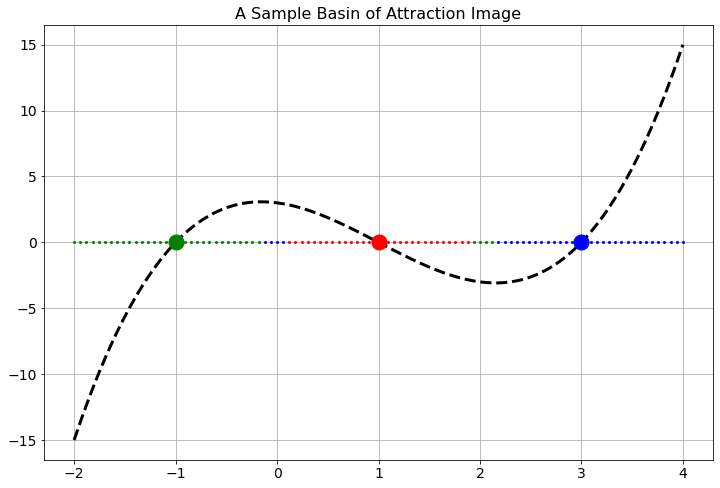

1.   Create a basin on attraction image for the function $f(x) = (x-4)(x+1)$.
2.   Create a basin on attraction image for the function $g(x) = (x-1)(x+3)$.
3.   Create a basin on attraction image for the function $h(x) = (x-4)(x-1)(x+3)$.

**Note:** You can use `matplotlib`, `plotly`, `pyplot`, `seaborn` or whatever plotting package you want.












In [ ]:
from abc import ABC, abstractmethod

class Function(ABC):

  @abstractmethod
  def get_function(self, x):
    pass

  @abstractmethod
  def get_derivative(self, x):
    pass


class f(Function):

  def __init__(self):
    self.x_values=[]
    self.y_values=[]
    self.x_color=[]
    self.root = [-1, 4]
    self.root_color = {
        -1:"red",
        4:"green"
    }


  def get_function(self, x):
    y = (x -4) * (x + 1)
    return y

  def get_derivative(self, x):
    return (x+1) + (x - 4)


class g(Function):

  def __init__(self):
    self.x_values=[]
    self.y_values=[]
    self.x_color=[]
    self.root = [1, -3]
    self.root_color = {
        1:"red",
        -3:"green"
    }

  def get_function(self, x):
    y = (x - 1) * (x + 3)
    return y


  def get_derivative(self, x):
    return (x -1) + (x + 3)


class h(Function):

  def __init__(self):
    self.x_values=[]
    self.y_values=[]
    self.x_color=[]
    self.root = [1, 4, -3]
    self.root_color = {
        1:"red",
        4:"green",
        -3: "blue"
    }


  def get_function(self, x):

    y= (x -4) * (x - 1) * (x + 3)
    return y


  def get_derivative(self, x):
    return (x - 1) * (x + 3) + (x -4) * (x + 3) + (x - 4) * (x - 1)


In [ ]:

def newtonRaphson(func: Function, x: int):
    h = func.get_function(x) / func.get_derivative(x)
    while abs(h) >= 0.000001:
        h = func.get_function(x) / func.get_derivative(x)

        # x(i+1) = x(i) - f(x) / f'(x)
        x = x - h

    return x

def y_value_generator(func: Function, x:list):
  for i in x:
    func.y_values.append(func.get_function(i))

In [ ]:
def plot_func(func: Function, title: str):

  ## Generate Function
  y_value_generator(func, func.x_values)
  plt.plot(func.x_values, func.y_values)

  ## Color Roots
  for i in func.root_color:
    plt.scatter(i, 0, color= func.root_color[i], s=100)

  ## color Starting points
  y_points_zeros = np.zeros(len(func.x_values), dtype=int)
  plt.scatter(func.x_values, y_points_zeros, c = func.x_color, s=10)

  plt.title(title)
  plt.show()

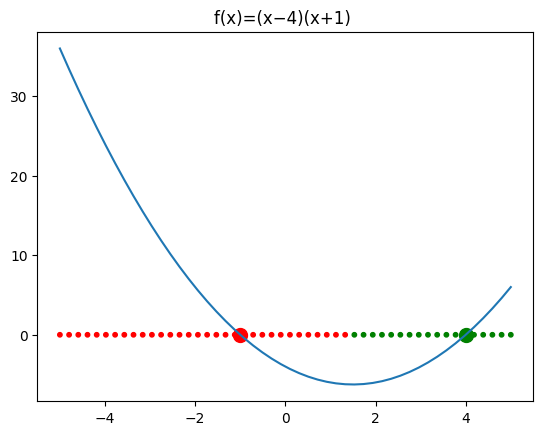

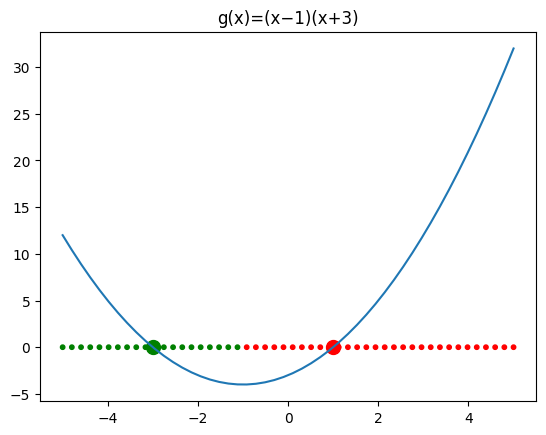

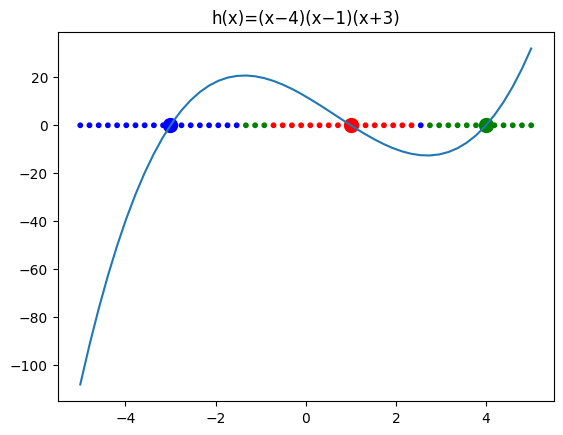

In [ ]:
x = np.linspace(-5, 5)
# print(x)
f_ = f()
g_ = g()
h_ = h()
f_.x_values = x
g_.x_values = x
h_.x_values = x
for i in x:
  y_f = round(newtonRaphson(f_, i), 0)
  f_.x_color.append(f_.root_color[y_f])

  y_g = round(newtonRaphson(g_, i), 0)
  g_.x_color.append(g_.root_color[y_g])

  y_h = round(newtonRaphson(h_, i), 0)
  # print(y_h)
  h_.x_color.append(h_.root_color[y_h])


plot_func(f_, "f(x)=(x−4)(x+1) ")
plot_func(g_, "g(x)=(x−1)(x+3)")
plot_func(h_, "h(x)=(x−4)(x−1)(x+3)")

# **Problem 2** - The Goat Problem
To understand the problem statement, grab a pencil and a piece of paper at first!
* Draw a coordinate plane
* Draw a circle with radius $1$ unit centered at the point $(0,1)$. This circle will obviously be tangent to the $x$-axis.
* Draw a circle with radius $r$ centered at the point $(0,0)$. Take $0< r < 2$ so there are two intersections of the two circles.
* Label the left-hand intersection of the two circles as point $A$. (Point $A$ should be in the second quadrant of your coordinate plane.)
* Label the right-hand intersection of the two circles as point $B$. (Point $B$ should be in the first quadrant of your coordinate plane.)
* Label the point $(0,0)$ as the point $P$.

A rancher has built a circular fence of radius $1$ unit centered at the point $(0,1)$ for his goat to graze. He tethers his goat at point $P$ on the far south end of the circular fence. He wants to make the length of the goat’s chain, $r$, just long enough so that it can graze half of the area of the fenced region. How long should he make the chain?

**Hints:**

*   It would be helpful to write equations for both circles. Then you can use the equations to find the coordinates of the intersection points $A$ and $B$.
* You can either solve for the intersection points algebraically or you can use a numerical root finding technique to find the intersection points.
* In any case, the intersection points will (obviously) depend on the value of $r$.
* Set up an integral to find the area grazed by the goat.
* You will likely need to use a numerical integration technique to evaluate the integral.
* You might need to perform numerical integration for this problem. You can implement your own function for this or you can opt to use the `scipy.integrate.quad()` function.

Write your code to narrow down on the best value of $r$ where the integral evaluates to half the area of the fenced region.


In [ ]:
def f_1(x, r):
  if r < x:
    return -1
  return (r ** 2 - x ** 2) ** .5

def f_2(x, r):
  if r < x:
    return -1
  return (1 - (1- x **2) ** .5)

def f_3(x, r):
  if r < x:
    return -1
  return (1 + (1- x **2) ** .5)


In [ ]:
#print(f_1(5, 2))
left = 0
right = 2

area_needs_to_be_grazed = math.pi /2
ok = 0
while left < right:
  m = left + (right - left) / 2

  first_eq_int = quad(f_1, float(- (m * (1 - ((m ** 2) / 4)) ** .5 )), float(( (m * (1 - ((m ** 2) / 4)) ** .5 ))), args=(float(m)))[0]
  second_eq_int = quad( f_2, float(- (m * (1 - ((m ** 2) / 4)) ** .5 )), float(( (m * (1 - ((m ** 2) / 4)) ** .5 ))), args=(float(m)))[0]
  third_eq_int = quad( f_3,float(- (m * (1 - ((m ** 2) / 4)) ** .5 )), float(( (m * (1 - ((m ** 2) / 4)) ** .5 ))), args=(float(m)))[0]

  val = first_eq_int - second_eq_int
  # print(m, val)
  # print(first_eq_int, second_eq_int, third_eq_int)
  if area_needs_to_be_grazed - 10** -6 <= val <= area_needs_to_be_grazed+ 10 ** -6:
    print("r=", m, "area=", val)
    ok = 1
    break

  else:
    if val > area_needs_to_be_grazed:
      right = m
    else:
      left = m
# ok=0
if ok == 0:
  while left < right:
    m = left + (right - left) / 2
    print(float(- (m * (1 - ((m ** 2) / 4) ** .5))), "a")
    first_eq_int = quad(f_1, float(- (m * (1 - ((m ** 2) / 4)) ** .5 )), float(( (m * (1 - ((m ** 2) / 4)) ** .5 ))), args=(float(m)))[0]
    second_eq_int = quad( f_2, float(- (m * (1 - ((m ** 2) / 4)) ** .5 )), float(( (m * (1 - ((m ** 2) / 4)) ** .5 ))), args=(float(m)))[0]
    third_eq_int = quad( f_3,float(- (m * (1 - ((m ** 2) / 4)) ** .5 )), float(( (m * (1 - ((m ** 2) / 4)) ** .5 ))), args=(float(m)))[0]

    val = first_eq_int - third_eq_int

    if area_needs_to_be_grazed - 10** -6 <= val <= area_needs_to_be_grazed + 10 ** -6:
      ok = 1
      print("r=", m, "area=", val)
      break

    else:
      if val > area_needs_to_be_grazed:
        right = m
      else:
        left = m

# print(first_eq_int, second_eq_int, third_eq_int)

r= 1.1587285995483398 area= 1.5707966061968837


# **Problem 3** - Game of Cookies
Alice a dessert-queen who can make exceptionally yummy chocolate chip cookies. Bob is a cookie connoisseur whose hunger rivals that of the (in)famous Cookie Monster from Sesame Street. One day, Alice and Bob decide to play a game. Bob chooses an arbitrary positive integer $k$. Alice doesn't know what this number $k$ is. She chooses two real numbers $a$ and $b$ randomly from within the interval $[0,1]$ with uniform distribution. Suppose, you are acting as the referee in this game. You compute the square root of the sum $(ak+1)^2 + (bk+1)^2$ and round it to the next integer. If the result is equal to $k$, Bob gets to eat $k$ of Alice's cookies for free; otherwise he doesn't get to eat any cookies.

For example, if $k = 6$, $a = 0.2$, and $b=0.85$, then the value that you get would be $\sqrt{(ak+1)^2 + (bk+1)^2} = \sqrt{42.05} = 6.484$. After you round it to the nearest integer it becomes $6$ which is equal to $k$. So, Bob will be allowed to eat $6$ cookies.

## Input
You'll be given the value of $n$, the number of turns of the game.

## Output
Print the expected value of the total number of cookies Bob will eat, rounded to five decimal places, if he plays $n$ turns with $k=1$, $k=2$, $k=3$, $\dots$, $k=n$ (for the $1^{st}$, $2^{nd}$, $3^{rd}$, $\dots$, and $n^{th}$ turns respectively).

### Sample Cases
#### Input
$10$

#### Output
$10.20914$

#### Input
$73$

#### Output
$105.27674$

#### Input
$100000$

#### Output
$157055.80999$

#### Input
$69420$

#### Output
$109021.5883$

**Hint:** You might need to perform numerical integration for this problem. You can implement your own function for this or you can opt to use the `scipy.integrate.quad()` function.


# **Problem 4** - Geronimo!
An object falling vertically through the air is subject to friction due to air resistance as well as gravity. The function describing the position of such a function is
$$s(t) = s_0 - \frac{mg}{k}t + \frac{m^2g}{k^2}\left(1-e^{-kt/m}\right)$$
where $m$ is the mass measured in kg, $g$ is gravity measured in meters per second per second, $s_0$ is the initial position measured in meters, and $k$ is the coefficient of air resistance.

If $m=1kg$, $g=9.8ms^{-2}$, $k=0.1$, and $s_0=100m$, how long will it take for the object to hit the ground?

In [ ]:
import math

m = 1
g = 9.8
k = 0.1
s_0 = 100

In [ ]:
def calc(t):
  val = (m*g/k)*t -(((m**2)*g)/(k**2) * (1- math.exp((-k*t)/m)) )
  return val

In [ ]:
l = 0
r = 5

while l<=r:
  m = l+(r-l)/2
  #print(".")
  if s_0 - 10 **(-9) <= calc(m) <= s_0 + 10 **(-9):
    print("t=",m, "s_0=", calc(m))
    break
  else:
    if calc(m) > s_0:
      r = m
    else:
      l = m

#print(calc(5))

t= 4.592827691958519 s_0= 99.99999999987699


# **Problem 5** - Int$\times$Plot
Numerically integrate each of the functions over the interval $[-1,2]$ with an appropriate technique and verify mathematically that your numerical integral is correct to 10 decimal places. Then provide a plot of the function along with its area beneath the curve.


1.   $f(x) = \frac{x}{1+x^4}$
2.   $g(x) = (x-1)^3(x-2)^2$
3. $h(x) = \sin(x^2)$

**Note:** Implement your own numerical integration function for this problem.



In [ ]:
def exact_integral(func, lower, upper):
    # Write your implementation here.
    I = quad(func, lower, upper)

    return I[0]

In [ ]:
def MultiSimpson1by3(func, n, tmin, tmax):
    # Write your implementation here.

    if n % 2 ==0:
      h = ((tmax - tmin)/n)
      f_init = func(tmin)
      f_odd = 0
      f_even = 0
      f_n = func(tmin + h * n)
      for i in range(1, n):
        if i % 2 == 1:
          f_odd += func(tmin + h*i)
        else:
          f_even += func(tmin + h * i)

      res  = (h/3) * (f_init + 4 * f_odd + 2 * f_even + f_n)
      return res
    else:
      return -1

In [ ]:
def Integrate(func: Function):
  n = 2
  while  round(exact_integral(func.get_function, lower, upper), 10) - round(MultiSimpson1by3(func.get_function, n, lower, upper), 10) != 0:
    n += 2

  return round(MultiSimpson1by3(func.get_function, n, lower, upper), 10)


In [ ]:
def plot_integrate(func: Function, start, end):

  x = np.arange(-2, 5, 0.1)
  y = func.get_function(x)

  plt.plot(x, y, 'k--')
  #Fill under the curve
  plt.fill_between(
          x,
          y,
          where= (start < x)&(x < end),
          color= "blue",
          alpha= .5)
  plt.show()


In [ ]:
class f_5(Function):

  def get_function(self, x):
    y = (x) / (1 + x ** 4)
    return y


  def get_derivative(self, x):
    pass

class g_5(Function):

  def get_function(self, x):
    y = ((x - 1) ** 3) * ((x - 2) ** 2)
    return y

  def get_derivative(self, x):
    pass

class h_5(Function):

  def get_function(self, x):

    if type(x) == np.ndarray:
      y = []
      for i in x:
        y_temp = math.sin(i ** 2)
        y.append(y_temp)

    else:
      y = math.sin( x * x)

    return y

  def get_derivative(self, x):
    pass

Integration of f(x)=x/1+x^4 from -1 to 2  0.2702097501


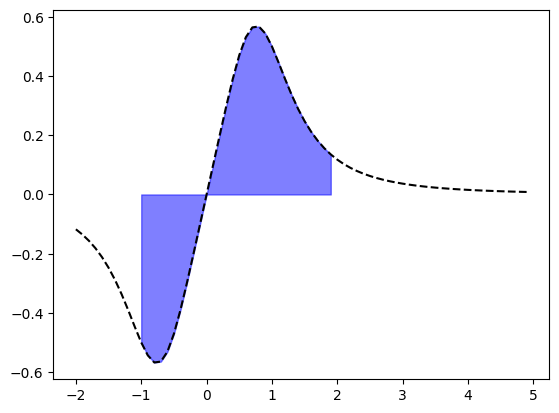

Integration of g(x)=(x-1)^3 * (x-2)^2  from -1 to 2  -27.45


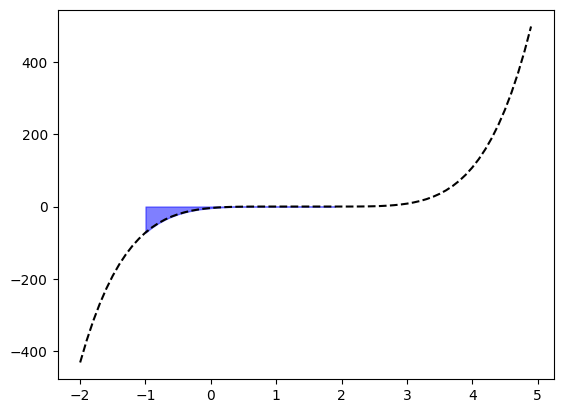

Integration of h(x)=sin(x^2)  from -1 to 2  1.1150447911


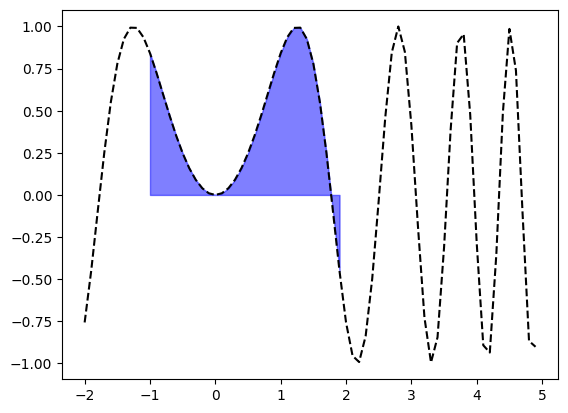

In [ ]:
f_5_ = f_5()
g_5_ = g_5()
h_5_ = h_5()
lower = -1
upper = 2
n = 2
start = -1
end = 2
print( "Integration of f(x)=x/1+x^4 from -1 to 2 ", Integrate(f_5_))
plot_integrate(f_5_, start, end)

print( "Integration of g(x)=(x-1)^3 * (x-2)^2  from -1 to 2 ", Integrate(g_5_))
plot_integrate(g_5_, start, end)

print( "Integration of h(x)=sin(x^2)  from -1 to 2 ", Integrate(h_5_))
plot_integrate(h_5_, start, end)
# print(round(exact_integral(f_5_.get_function, lower, upper), 10) , round(MultiSimpson1by3(f_5_.get_function, n, lower, upper), 10))